[Predicting Earnings from Census Data](https://ocw.mit.edu/courses/sloan-school-of-management/15-071-the-analytics-edge-spring-2017/trees/assignment-4/)

#### The United States government periodically collects demographic information by conducting a census.
#### In this problem, we are going to use census information about an individual to predict how much a person earns -- in particular, whether the person earns more than $50,000 per year. This data comes from the UCI Machine Learning Repository.
#### The file census (CSV - 3.3MB) contains 1994 census data for 31,978 individuals in the United States.
#### The dataset includes the following 13 variables:
- <font color='red'>age = the age of the individual in years</font><br>
- <font color='red'>workclass = the classification of the individual's working status (does the person work for the federal government, work for the local government, work without pay, and so on)</font><br>
- <font color='red'>education = the level of education of the individual (e.g., 5th-6th grade, high school graduate, PhD, so on)</font><br>
- <font color='red'>maritalstatus = the marital status of the individual</font><br>
- <font color='red'>occupation = the type of work the individual does (e.g., administrative/clerical work, farming/fishing, sales and so on)</font><br>
- <font color='red'>relationship = relationship of individual to his/her household</font><br>
- <font color='red'>race = the individual's race</font><br>
- <font color='red'>sex = the individual's sex</font><br>
- <font color='red'>capitalgain = the capital gains of the individual in 1994 (from selling an asset such as a stock or bond for more than the original purchase price)</font><br>
- <font color='red'>capitalloss = the capital losses of the individual in 1994 (from selling an asset such as a stock or bond for less than the original purchase price)</font><br>
- <font color='red'>hoursperweek = the number of hours the individual works per week</font><br>
- <font color='red'>nativecountry = the native country of the individual</font><br>
- <font color='red'>over50k = whether or not the individual earned more than \\$50,000 in 1994</font><br>

# Problem 1.1 - A Logistic Regression Model

#### Let's begin by building a logistic regression model to predict whether an individual's earnings are above \\$50,000 (the variable "over50k") using all of the other variables as independent variables. First, read the dataset census.csv into R.
#### Then, split the data randomly into a training set and a testing set, setting the seed to 2000 before creating the split. Split the data so that the training set contains 60\% of the observations, while the testing set contains 40\% of the observations.
#### Next, build a logistic regression model to predict the dependent variable "over50k", using all of the other variables in the dataset as independent variables. Use the training set to build the model.
#### Which variables are significant, or have factors that have at least one significant dummy variable? (Use 0.1 as your significance threshold, so variables with a period or dot in the stars column should be counted too. You might see a warning message here - you can ignore it and proceed. This message is a warning that we might be overfitting our model to the training set.) Select all that apply.
- <font color='red'>age</font> # Correct <br>
- <font color='red'>workclass</font> # Correct <br>
- <font color='red'>education</font> # Correct <br>
- <font color='red'>maritalstatus</font> # Correct <br>
- <font color='red'>occupation</font> # Correct <br>
- <font color='red'>relationship</font> # Correct <br>
- <font color='red'>race</font><br>
- <font color='red'>sex</font> # Correct <br>
- <font color='red'>capitalgain</font> # Correct <br>
- <font color='red'>capitalloss</font> # Correct <br>
- <font color='red'>hoursperweek</font> # Correct <br>
- <font color='red'>nativecountry</font><br>

In [1]:
census  <- read.csv("../data/census.csv")
str(census)

'data.frame':	31978 obs. of  13 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass    : Factor w/ 9 levels " ?"," Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ education    : Factor w/ 16 levels " 10th"," 11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ maritalstatus: Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation   : Factor w/ 15 levels " ?"," Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capitalgain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capitalloss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hoursperweek : int  40 13 40 40 40 40 16 45 50 40 ...
 $ nativecountry: Factor w/ 41 levels " Cambodia"," Canada",..: 39 39 39 39 5 39 23 39 39 39 ...
 $ over50k      : Fa

In [2]:
set.seed(2000)
library(caTools)
spl  <- sample.split(census, SplitRatio = 0.6)
Train <- subset(census, spl == TRUE)
Test <- subset(census, spl == FALSE)
model  <- glm(over50k ~ ., data= Train, family = binomial)
summary(model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = over50k ~ ., family = binomial, data = Train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2341  -0.5045  -0.1821  -0.0004   3.4323  

Coefficients: (1 not defined because of singularities)
                                           Estimate Std. Error z value Pr(>|z|)
(Intercept)                              -7.664e+00  1.113e+00  -6.887 5.71e-12
age                                       2.441e-02  2.280e-03  10.708  < 2e-16
workclass Federal-gov                     1.146e+00  2.124e-01   5.397 6.80e-08
workclass Local-gov                       5.010e-01  1.925e-01   2.603 0.009239
workclass Never-worked                   -1.045e+01  1.142e+03  -0.009 0.992699
workclass Private                         7.582e-01  1.712e-01   4.428 9.51e-06
workclass Self-emp-inc                    9.394e-01  2.051e-01   4.580 4.64e-06
workclass Self-emp-not-inc                4.050e-01  1.881e-01   2.153 0.031304
workclass State-gov                       3

# Problem 1.2 - A Logistic Regression Model

#### What is the accuracy of the model on the testing set? Use a threshold of p = 0.5. (You might see a warning message when you make predictions on the test set - you can safely ignore it.)

In [3]:
predTest <- predict(model, newdata = Test, type="response")
table(Test$over50k, predTest >= 0.5)
(10421+2123)/(10421+777+1439+2123)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

        
         FALSE  TRUE
   <=50K 10421   777
   >50K   1439  2123

[1] 0.8498645

# Problem 1.3 - A Logistic Regression Model

#### What is the accuracy of the baseline model on the testing set?

In [4]:
table(Test$over50k)
11198/(11198+3562)


 <=50K   >50K 
 11198   3562 

[1] 0.7586721

# Problem 1.4 - A Logistic Regression Model

#### What is the area under the curve (AUC) for the logistic regression model on the test set?

In [5]:
library(ROCR)
ROCRpredTest = prediction(predTest, Test$over50k)
(auc = as.numeric(performance(ROCRpredTest, "auc")@y.values))

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



[1] 0.9049434

# Problem 2.1 - A CART Model

#### We have just seen how a logistic regression model for this data achieves a high accuracy. Moreover, the significances of the variables give us a way to gauge which variables are relevant for this prediction task. However, it is not immediately clear which variables are more important than the others, especially due to the large number of factor variables in this problem.
#### Let us now build a CART model to predict "over50k". Use the training set to build the model, with all of the other variables as independent variables. Use the default parameters (with the default loss table), so don't set a value for minbucket or cp and do not specify a loss table. Remember to specify method="class" as an argument to rpart, since this is a classification problem. After you are done building the model, plot the resulting tree.
#### How many splits does the tree have in total?

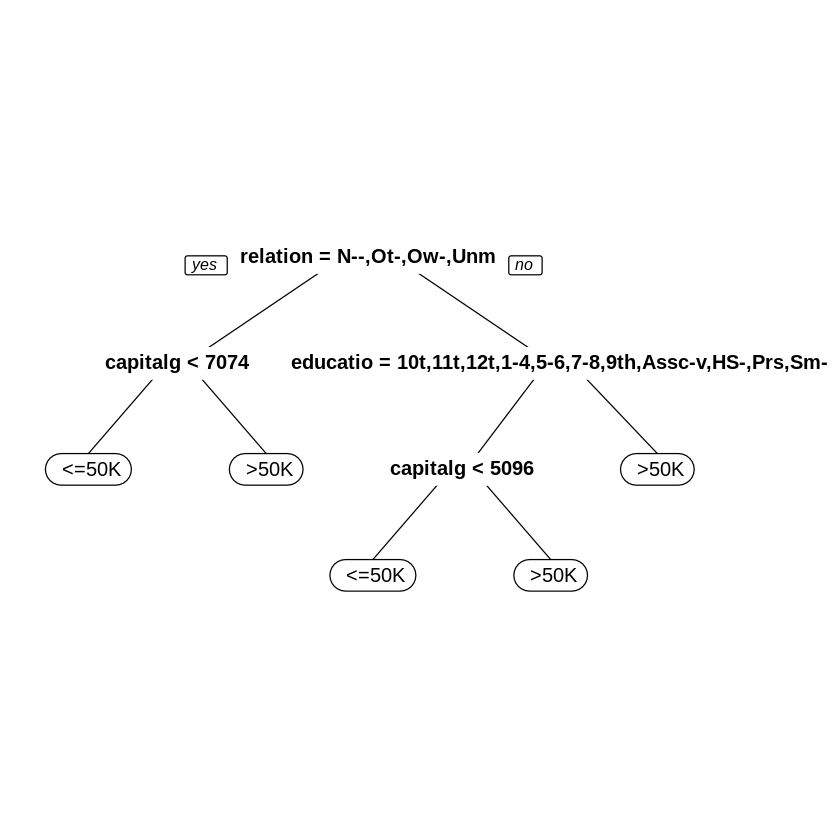

In [6]:
library(rpart)
library(rpart.plot)
cartModel <- rpart(over50k ~ ., data=Train, method="class")
prp(cartModel)

# Problem 2.2 - A CART Model

#### Which variable does the tree split on at the first level (the very first split of the tree)?
- <font color='red'>age</font><br>
- <font color='red'>workclass</font><br>
- <font color='red'>education</font><br>
- <font color='red'>maritalstatus</font><br>
- <font color='red'>occupation</font><br>
- <font color='red'>relationship</font> # Correct <br>
- <font color='red'>race</font><br>
- <font color='red'>sex</font><br>
- <font color='red'>capitalgain</font><br>
- <font color='red'>capitalloss</font><br>
- <font color='red'>hoursperweek</font><br>
- <font color='red'>nativecountry</font><br>

# Problem 2.3 - A CART Model

#### Which variables does the tree split on at the second level (immediately after the first split of the tree)? Select all that apply.
- <font color='red'>age</font><br>
- <font color='red'>workclass</font><br>
- <font color='red'>education</font> # Correct <br>
- <font color='red'>maritalstatus</font><br>
- <font color='red'>occupation</font><br>
- <font color='red'>relationship</font><br>
- <font color='red'>race</font><br>
- <font color='red'>sex</font><br>
- <font color='red'>capitalgain</font> # Correct <br>
- <font color='red'>capitalloss</font><br>
- <font color='red'>hoursperweek</font><br>
- <font color='red'>nativecountry</font><br>

# Problem 2.4 - A CART Model

#### What is the accuracy of the model on the testing set?

In [7]:
PredictCart <- predict(cartModel, newdata = Test, type = "class")
table(Test$over50k, PredictCart)
(10531+1890) / (10531+667+1672+1890)

        PredictCart
          <=50K  >50K
   <=50K  10531   667
   >50K    1672  1890

[1] 0.8415312

#### <font color='red'>This highlights a very regular phenomenon when comparing CART and logistic regression. CART often performs a little worse than logistic regression in out-of-sample accuracy. However, as is the case here, the CART model is often much simpler to describe and understand.</font>

# Problem 3.1 - A Random Forest Model

#### Before building a random forest model, we'll down-sample our training set. While some modern personal computers can build a random forest model on the entire training set, others might run out of memory when trying to train the model since random forests is much more computationally intensive than CART or Logistic Regression. For this reason, before continuing we will define a new training set to be used when building our random forest model, that contains 2000 randomly selected obervations from the original training set. Do this by running the following commands in your R console (assuming your training set is called "censusTrain"):
#### set.seed(1)
#### trainSmall = censusTrain[sample(nrow(censusTrain), 2000), ]
#### Let us now build a random forest model to predict "over50k", using the dataset "trainSmall" as the data used to build the model. Set the seed to 1 again right before building the model, and use all of the other variables in the dataset as independent variables. (If you get an error that random forest "can not handle categorical predictors with more than 32 categories", re-build the model without the nativecountry variable as one of the independent variables.)
#### Then, make predictions using this model on the entire test set. What is the accuracy of the model on the test set, using a threshold of 0.5? (Remember that you don't need a "type" argument when making predictions with a random forest model if you want to use a threshold of 0.5. Also, note that your accuracy might be different from the one reported here, since random forest models can still differ depending on your operating system, even when the random seed is set. )

In [8]:
set.seed(1)
trainSmall = census[sample(nrow(census), 2000), ]
set.seed(1)
library(randomForest)
trainSmall$over50k <- as.factor(trainSmall$over50k)
Test$over50k <- as.factor(Test$over50k)
censusForest  <- randomForest(over50k ~ ., data= trainSmall)#, nodesize = 25, ntree = 200
predictionsForest = predict(censusForest, newdata= Test)
table(Test$over50k, predictionsForest)
(10315+2364) / (10315+883+1198+2364)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


        predictionsForest
          <=50K  >50K
   <=50K  10315   883
   >50K    1198  2364

[1] 0.8590108

#### You may be surprised that the test-set accuracy of the random forest model is lower than the test-set accuracies of some of the other, simpler models we've trained. This can occur when the parameters of the random forest have not been tuned via cross-validation and the default parameters are ill suited for the dataset.

# Problem 4.1 - Selecting cp by Cross-Validation

#### We now conclude our study of this data set by looking at how CART behaves with different choices of its parameters.
#### Let us select the cp parameter for our CART model using k-fold cross validation, with k = 10 folds. Do this by using the train function. Set the seed beforehand to 2. Test cp values from 0.002 to 0.092 in 0.01 increments, by using the following command:
#### cartGrid = data.frame( .cp = seq(0.002,0.092,0.01))
#### After you create the cartGrid variable, you can pass it on to the train function by letting tuneGrid = cartGrid.
#### Also, remember to use the entire training set "censusTrain" when building this model. The train function might take some time to run.
#### Which value of cp does the train function recommend?

In [9]:
library(caret)
library(e1071)
numFolds = trainControl( method = "cv", number = 10 )
cartGrid <- data.frame( .cp = seq(0.002,0.092,0.01))
set.seed(2)
(cartCV  <- train(over50k ~ ., data = Train,method = "rpart", 
      trControl = numFolds, tuneGrid = cartGrid ))

Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin



CART 

17218 samples
   12 predictor
    2 classes: ' <=50K', ' >50K' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 15496, 15496, 15495, 15497, 15496, 15495, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa    
  0.002  0.8563712  0.5751312
  0.012  0.8466732  0.5407577
  0.022  0.8433049  0.5199841
  0.032  0.8433049  0.5199841
  0.042  0.8297742  0.4627558
  0.052  0.8215250  0.4164289
  0.062  0.8101415  0.2984142
  0.072  0.7599605  0.0000000
  0.082  0.7599605  0.0000000
  0.092  0.7599605  0.0000000

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.002.

# Problem 4.2 - Selecting cp by Cross-Validation

#### Recall that the caret package causes categorical independent variables to be split into factor levels. To generate a version of the test set with dummy variables, please run the following command (which assumes your test set is stored in variable "censusTest"):
#### censusTestMM = as.data.frame(model.matrix(over50k~.+0, data=censusTest))
#### Use the final model selected via cross-validation to make predictions on censusTestMM. What is the prediction accuracy on the test set?

In [10]:
model <- cartCV$final
censusTestMM = as.data.frame(model.matrix(over50k~.+0, data=Test))
predictTest = predict(model, newdata=censusTestMM, type="class")
table(Test$over50k, predictTest)
(10490+2085)/(10490+708+1477+2085)

        predictTest
          <=50K  >50K
   <=50K  10490   708
   >50K    1477  2085

[1] 0.8519648

# Problem 4.3 - Selecting cp by Cross-Validation

#### Compared to the original accuracy using the default value of cp, this new CART model is an improvement, and so we should clearly favor this new model over the old one -- or should we? Plot the CART tree for this model. How many splits are there?

In [11]:
max(model$cptable[,2])

[1] 17

#### <font color='red'>This highlights one important tradeoff in building predictive models. By tuning cp, we improved our accuracy, but our tree became significantly more complex. In some applications, such an improvement in accuracy would be worth the loss in interpretability. In others, we may prefer a less accurate model that is simpler to understand and describe over a more accurate -- but more complicated -- model.</font>